## EDA of US Airline Twitter Dataset
#### [Dataset Link](https://www.kaggle.com/datasets/crowdflower/twitter-airline-sentiment)

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
def load_data():
    df = pd.read_csv("datasets/US Airline Twitter Sentiment Analysis.csv")
    print(f"df shape: {df.shape}")

    return df

In [ ]:
df = load_data()

df shape: (14640, 15)


In [ ]:
df.head(10)

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)
5,570300767074181121,negative,1.0000,Can't Tell,0.6842,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica seriously would pay $30 a fligh...,NaN,2015-02-24 11:14:33 -0800,NaN,Pacific Time (US & Canada)
6,570300616901320704,positive,0.6745,NaN,0.0000,Virgin America,NaN,cjmcginnis,NaN,0,"@VirginAmerica yes, nearly every time I fly VX...",NaN,2015-02-24 11:13:57 -0800,San Francisco CA,Pacific Time (US & Canada)
7,570300248553349120,neutral,0.6340,NaN,NaN,Virgin America,NaN,pilot,NaN,0,@VirginAmerica Really missed a prime opportuni...,NaN,2015-02-24 11:12:29 -0800,Los Angeles,Pacific Time (US & Canada)
8,570299953286942721,positive,0.6559,NaN,NaN,Virgin America,NaN,dhepburn,NaN,0,"@virginamerica Well, I didn't…but NOW I DO! :-D",NaN,2015-02-24 11:11:19 -0800,San Diego,Pacific Time (US & Canada)
9,570295459631263746,positive,1.0000,NaN,NaN,Virgin America,NaN,YupitsTate,NaN,0,"@VirginAmerica it was amazing, and arrived an ...",NaN,2015-02-24 10:53:27 -0800,Los Angeles,Eastern Time (US & Canada)


## 1.EDA (Exploratory Data Analysis)

### 1.1 Summary Statistics

In [ ]:
def eda(df):
    #count NaN values
    df_nan = pd.DataFrame(columns= ['column_name', 'NaN count'])
    for column in df.columns:
        row = {'column_name':column, 'NaN count':df[column].isna().sum()}
        df_nan = pd.concat([df_nan, pd.DataFrame([row])])

    #unique text values
    df_text_columns = ['airline_sentiment', 'negativereason', 'airline']
    df_unique = pd.DataFrame(columns= ['column_name', 'unique_values'])
    for column in df_text_columns:
        row = {'column_name':column, 'unique_values':df[column].unique()}
        df_unique = pd.concat([df_unique, pd.DataFrame([row])])

    #numeric value columns analysis
    df_numeric = df.describe(include=[np.number])

    return df_nan, df_unique, df_numeric

In [ ]:
df_nan, df_unique, df_numeric = eda(df)

In [ ]:
df_nan.reset_index(drop=True) #NaN values count

,column_name,NaN count
0,tweet_id,0
1,airline_sentiment,0
2,airline_sentiment_confidence,0
3,negativereason,5462
4,negativereason_confidence,4118
5,airline,0
6,airline_sentiment_gold,14600
7,name,0
8,negativereason_gold,14608
9,retweet_count,0


In [ ]:
df_unique.reset_index(drop=True) #unique values in text columns

,column_name,unique_values
0,airline_sentiment,"[neutral, positive, negative]"
1,negativereason,"[nan, Bad Flight, Can't Tell, Late Flight, Cus..."
2,airline,"[Virgin America, United, Southwest, Delta, US ..."


In [ ]:
df_numeric #numeric columns

,tweet_id,airline_sentiment_confidence,negativereason_confidence,retweet_count
count,1.464000e+04,14640.000000,10522.000000,14640.000000
mean,5.692184e+17,0.900169,0.638298,0.082650
std,7.791112e+14,0.162830,0.330440,0.745778
min,5.675883e+17,0.335000,0.000000,0.000000
25%,5.685592e+17,0.692300,0.360600,0.000000
50%,5.694779e+17,1.000000,0.670600,0.000000
75%,5.698905e+17,1.000000,1.000000,0.000000
max,5.703106e+17,1.000000,1.000000,44.000000


### 1.2 Visualizations

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

#### 1.2.1 Sentiment column values

neutral:  3099
positive: 2363
negative: 9178


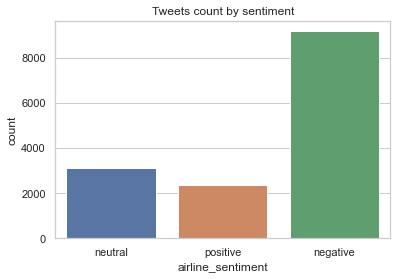

In [ ]:
print(f"neutral:  {sum(df['airline_sentiment']=='neutral')}")
print(f"positive: {sum(df['airline_sentiment']=='positive')}")
print(f"negative: {sum(df['airline_sentiment']=='negative')}")

plt.title('Tweets count by sentiment')
sns.set(style = 'whitegrid')
sns.countplot(x=df['airline_sentiment'])
plt.show()

#### 1.2.2 Airlines column values

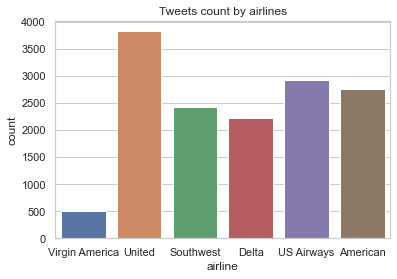

In [ ]:
plt.title('Tweets count by airlines')
sns.set(style = 'whitegrid')
sns.countplot(x=df['airline'])
plt.show()

#### 1.2.3 Airline specific Sentiment column values


In [ ]:
def get_airline_sentiment(df):
    positives = []
    negatives = []
    neutrals = []
    airlines = df['airline'].unique()

    for airline in airlines:
        positive = df.query('@airline == airline and airline_sentiment == "positive"')['tweet_id'].count()
        negative = df.query('@airline == airline and airline_sentiment == "negative"')['tweet_id'].count()
        neutral = df.query('@airline == airline and airline_sentiment == "neutral"')['tweet_id'].count()

        positives.append(positive)
        negatives.append(negative)
        neutrals.append(neutral)

    #dataframe to store airline specific sentiments
    sentiment_airlines_df = pd.DataFrame(index = airlines);
    sentiment_airlines_df['neutrals'] = neutrals
    sentiment_airlines_df['positives'] = positives
    sentiment_airlines_df['negatives'] = negatives

    #dataframe to store airline specific sentiments in percentage
    sentiment_airlines_percentage_df = pd.DataFrame(index = airlines);
    sentiment_airlines_percentage_df['neutrals (%)'] = list(map(lambda n: n / sum(neutrals) * 100, neutrals))
    sentiment_airlines_percentage_df['positives (%)'] = list(map(lambda n: n / sum(positives) * 100, positives))
    sentiment_airlines_percentage_df['negatives (%)'] = list(map(lambda n: n / sum(negatives) * 100, negatives))
    sentiment_airlines_percentage_df

    return sentiment_airlines_df, sentiment_airlines_percentage_df

In [ ]:
df_airline_sentiment, df_airline_sentiment_percentage = get_airline_sentiment(df)

In [ ]:
df_airline_sentiment

,neutrals,positives,negatives
Virgin America,171,152,181
United,697,492,2633
Southwest,664,570,1186
Delta,723,544,955
US Airways,381,269,2263
American,463,336,1960


In [ ]:
df_airline_sentiment_percentage

,neutrals (%),positives (%),negatives (%)
Virgin America,5.517909,6.432501,1.972107
United,22.491126,20.820990,28.688167
Southwest,21.426267,24.121879,12.922205
Delta,23.330106,23.021583,10.405317
US Airways,12.294288,11.383834,24.656788
American,14.940303,14.219213,21.355415


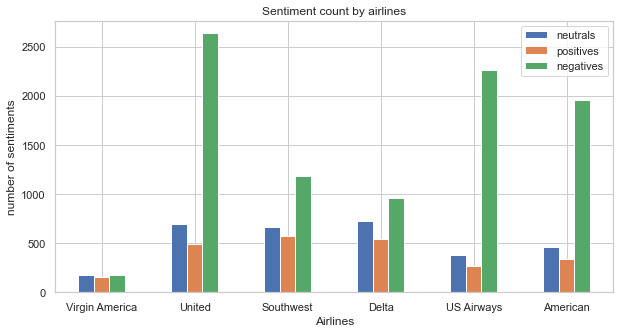

In [ ]:
df_airline_sentiment.plot.bar(rot=0, figsize=(10,5))
plt.title('Sentiment count by airlines')
plt.xlabel('Airlines')
plt.ylabel('number of sentiments')
plt.show()